In [0]:
import pandas as pd
df= pd.read_csv("energydata_complete.csv")
df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.1,48.590000,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.1,48.590000,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.1,48.590000,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.1,48.590000,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.1,48.590000,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt



In [0]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

df = df.drop(['date'], axis=1)
df['Efficiency'] = np.where(df['Appliances'] >= 60, 1, 0)
df = df.drop(['Appliances'], axis=1)
x = df.drop(['Efficiency'], axis=1)
y = df['Efficiency']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)


cols=['T1','RH_1','T2','T3','RH_3','T4','T5','T7','RH_7','T_out']
Xtrain=x_train[cols]
std_Xtrain = preprocessing.scale(Xtrain)
Xtest=x_test[cols]
std_Xtest = preprocessing.scale(Xtest)
std_Xtrain.shape
std_Xtest.shape
y_test.shape

(5921,)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


model = Sequential()
model.add(Dense(50, input_dim=10, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain, y_train, epochs=10)
test_loss3, test_acc3 = model.evaluate(std_Xtest,  y_test, verbose=2)
train_loss3,train_acc3 = model.evaluate(std_Xtrain,  y_train, verbose=2)

print('\nTest accuracy:', test_acc3)
print('\nTrain accuracy:', train_acc3)


Epoch 1/10
13814/13814 [==============================] - 2s 179us/step - loss: 0.5890 - acc: 0.6868
Epoch 2/10
13814/13814 [==============================] - 2s 139us/step - loss: 0.5573 - acc: 0.7057
Epoch 3/10
13814/13814 [==============================] - 2s 143us/step - loss: 0.5426 - acc: 0.7154
Epoch 4/10
13814/13814 [==============================] - 2s 143us/step - loss: 0.5317 - acc: 0.7251
Epoch 5/10
13814/13814 [==============================] - 2s 145us/step - loss: 0.5254 - acc: 0.7275
Epoch 6/10
13814/13814 [==============================] - 2s 141us/step - loss: 0.5194 - acc: 0.7346
Epoch 7/10
13814/13814 [==============================] - 2s 140us/step - loss: 0.5130 - acc: 0.7423
Epoch 8/10
13814/13814 [==============================] - 2s 146us/step - loss: 0.5079 - acc: 0.7397
Epoch 9/10
13814/13814 [==============================] - 2s 147us/step - loss: 0.5040 - acc: 0.7434
Epoch 10/10
13814/13814 [==============================] - 2s 143us/step - loss: 0.4992 - a

In [0]:

def createmodel(neurons=10):
  
  model = Sequential()
  model.add(Dense(50, input_dim=10, activation='relu'))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model
model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
neurons = [10, 20, 30,40,50]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))


Best: 0.741205 using {'neurons': 40}


In [0]:
train_errors=[]
test_errors=[]
model = Sequential()
model.add(Dense(50, input_dim=10, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain, y_train, epochs=10,batch_size=20)
test_loss, test_acc = model.evaluate(std_Xtest,  y_test, verbose=2)
train_loss, train_acc = model.evaluate(std_Xtrain,  y_train, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTrain accuracy:', train_acc)


Test accuracy: 0.772335754095592

Train accuracy: 0.7925293181003633


In [0]:
model = Sequential()
model.add(Dense(50, input_dim=10, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain, y_train, epochs=10,batch_size=20)
test_loss1, test_acc1 = model.evaluate(std_Xtest,  y_test, verbose=2)
train_loss1,train_acc1 = model.evaluate(std_Xtrain,  y_train, verbose=2)

print('\nTest accuracy:', test_acc1)
print('\nTrain accuracy:', train_acc1)

Epoch 1/10
13814/13814 [==============================] - 5s 328us/step - loss: 0.5805 - acc: 0.6936
Epoch 2/10
13814/13814 [==============================] - 4s 260us/step - loss: 0.5389 - acc: 0.7203
Epoch 3/10
13814/13814 [==============================] - 4s 260us/step - loss: 0.5190 - acc: 0.7345
Epoch 4/10
13814/13814 [==============================] - 4s 259us/step - loss: 0.5049 - acc: 0.7449
Epoch 5/10
13814/13814 [==============================] - 4s 259us/step - loss: 0.4911 - acc: 0.7526
Epoch 6/10
13814/13814 [==============================] - 4s 268us/step - loss: 0.4810 - acc: 0.7581
Epoch 7/10
13814/13814 [==============================] - 4s 270us/step - loss: 0.4739 - acc: 0.7652
Epoch 8/10
13814/13814 [==============================] - 4s 266us/step - loss: 0.4671 - acc: 0.7659
Epoch 9/10
13814/13814 [==============================] - 4s 257us/step - loss: 0.4602 - acc: 0.7736
Epoch 10/10
13814/13814 [==============================] - 4s 262us/step - loss: 0.4539 - a

In [0]:
model = Sequential()
model.add(Dense(50, input_dim=10, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain, y_train, epochs=10,batch_size=20)
test_loss2, test_acc2 = model.evaluate(std_Xtest,  y_test, verbose=2)
train_loss2,train_acc2 = model.evaluate(std_Xtrain,  y_train, verbose=2)

print('\nTest accuracy:', test_acc2)
print('\nTrain accuracy:', train_acc2)

Epoch 1/10
13814/13814 [==============================] - 4s 290us/step - loss: 0.5887 - acc: 0.6886
Epoch 2/10
13814/13814 [==============================] - 3s 235us/step - loss: 0.5484 - acc: 0.7133
Epoch 3/10
13814/13814 [==============================] - 3s 228us/step - loss: 0.5322 - acc: 0.7248
Epoch 4/10
13814/13814 [==============================] - 3s 233us/step - loss: 0.5231 - acc: 0.7343
Epoch 5/10
13814/13814 [==============================] - 3s 238us/step - loss: 0.5138 - acc: 0.7398
Epoch 6/10
13814/13814 [==============================] - 3s 235us/step - loss: 0.5068 - acc: 0.7406
Epoch 7/10
13814/13814 [==============================] - 3s 239us/step - loss: 0.5018 - acc: 0.7476
Epoch 8/10
13814/13814 [==============================] - 3s 235us/step - loss: 0.4971 - acc: 0.7487
Epoch 9/10
13814/13814 [==============================] - 3s 236us/step - loss: 0.4904 - acc: 0.7535
Epoch 10/10
13814/13814 [==============================] - 3s 235us/step - loss: 0.4860 - a

In [0]:
model = Sequential()
model.add(Dense(70, input_dim=10, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain, y_train, epochs=10,batch_size=20)
test_loss3, test_acc3 = model.evaluate(std_Xtest,  y_test, verbose=2)
train_loss3,train_acc3 = model.evaluate(std_Xtrain,  y_train, verbose=2)

print('\nTest accuracy:', test_acc3)
print('\nTrain accuracy:', train_acc3)

Epoch 1/10
13814/13814 [==============================] - 5s 335us/step - loss: 0.5779 - acc: 0.6893
Epoch 2/10
13814/13814 [==============================] - 4s 289us/step - loss: 0.5329 - acc: 0.7272
Epoch 3/10
13814/13814 [==============================] - 4s 284us/step - loss: 0.5110 - acc: 0.7398
Epoch 4/10
13814/13814 [==============================] - 4s 280us/step - loss: 0.4951 - acc: 0.7513
Epoch 5/10
13814/13814 [==============================] - 4s 281us/step - loss: 0.4837 - acc: 0.7576
Epoch 6/10
13814/13814 [==============================] - 4s 277us/step - loss: 0.4709 - acc: 0.7651
Epoch 7/10
13814/13814 [==============================] - 4s 274us/step - loss: 0.4591 - acc: 0.7741
Epoch 8/10
13814/13814 [==============================] - 4s 275us/step - loss: 0.4474 - acc: 0.7815
Epoch 9/10
13814/13814 [==============================] - 4s 276us/step - loss: 0.4409 - acc: 0.7829
Epoch 10/10
13814/13814 [==============================] - 4s 277us/step - loss: 0.4342 - a

In [0]:
train_errors=[train_acc2,train_acc1,train_acc3]
test_errors=[test_acc2,test_acc1,test_acc3]
x=[2,3,4]
plt.figure()
plt.plot(x,train_errors,label='train accuracy')
plt.plot(x,test_errors,label='test accuracy')
plt.xlabel("Number of layers")
plt.xticks([2,3,4])
plt.ylabel("Accuracy")
plt.legend()
plt.show()

train_errors
test_errors


[0.7486910994764397, 0.7640601249788888, 0.770646850194224]

0.760533 with: {'neurons': 60}
0.750326 with: {'neurons': 70}
0.765455 with: {'neurons': 80}
0.757130 with: {'neurons': 90}


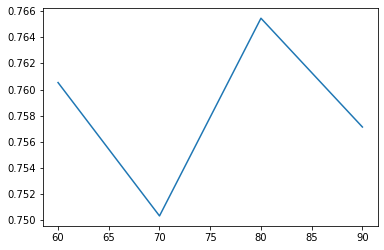

In [0]:
def createmodel(neurons=60):
  
  
  model = Sequential()
  model.add(Dense(neurons, input_dim=10, activation='relu'))
  model.add(Dense(50, input_dim=10, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
neurons = [60,70,80,90]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))
plt.figure()
plt.plot([60,70,80,90],means)
plt.show()

0.758216 with: {'neurons': 40}
0.761257 with: {'neurons': 50}
0.752208 with: {'neurons': 60}


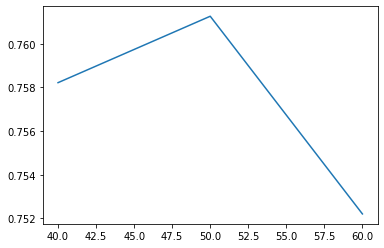

In [0]:
def createmodel(neurons=40):
  
  
  model = Sequential()
  model.add(Dense(80, input_dim=10, activation='relu'))
  model.add(Dense(neurons, input_dim=10, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
neurons = [40,50,60]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))
plt.figure()
plt.plot([40,50,60],means)
plt.show()

0.754814 with: {'neurons': 20}
0.760171 with: {'neurons': 30}
0.761184 with: {'neurons': 40}


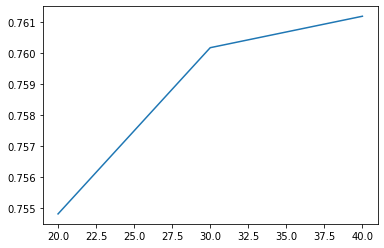

In [0]:
def createmodel(neurons=20):
  
  
  model = Sequential()
  model.add(Dense(80, input_dim=10, activation='relu'))
  model.add(Dense(50,activation='relu'))
  model.add(Dense(neurons, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
neurons = [20,30,40]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))
plt.figure()
plt.plot([20,30,40],means)
plt.show()

0.759954 with: {'activation': 'relu'}
0.733314 with: {'activation': 'tanh'}
0.686550 with: {'activation': 'sigmoid'}


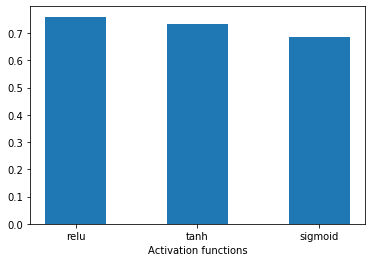

In [0]:
def createmodel(activation="relu"):
  
  
  model = Sequential()
  model.add(Dense(80, input_dim=10, activation=activation))
  model.add(Dense(50, activation=activation))
  model.add(Dense(40, activation=activation))
  model.add(Dense(10, activation=activation))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))
plt.figure()
plt.bar(activation,means,width=0.5)
plt.xlabel("Activation functions")
plt.show()


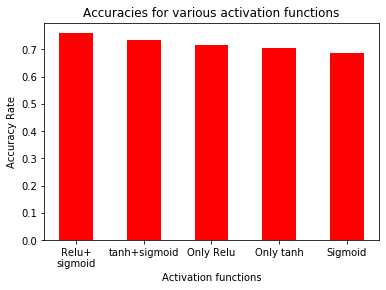

In [0]:
def createmodel(activation="relu"):
  
  
  model = Sequential()
  model.add(Dense(80, input_dim=10, activation=activation))
  model.add(Dense(50, activation=activation))
  model.add(Dense(40, activation=activation))
  model.add(Dense(10, activation=activation))
  model.add(Dense(1, activation=activation))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means1 = grid_result.cv_results_['mean_test_score']
params1 = grid_result.cv_results_['params']

for mean,param in zip(means1,params1):
    print("%f with: %r" % (mean, param))

accuracies=[means[0],means[1],means1[0],means1[1],means1[2]]
plt.figure()
xaxis=["Relu+\nsigmoid","tanh+sigmoid","Only Relu","Only tanh","Sigmoid"]
plt.bar(xaxis,accuracies,color="red",width=0.5)
plt.xlabel("Activation functions")
plt.ylabel("Accuracy Rate")
plt.title("Accuracies for various activation functions",)
plt.show()


In [0]:
def createmodel(optimizer="adam"):
  
  
  model = Sequential()
  model.add(Dense(80, input_dim=10, activation="relu"))
  model.add(Dense(50, activation="relu"))
  model.add(Dense(40, activation="relu"))
  model.add(Dense(10, activation="relu"))
  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means1 = grid_result.cv_results_['mean_test_score']
params1 = grid_result.cv_results_['params']
for mean,param in zip(means1,params1):
    print("%f with: %r" % (mean, param))
    
plt.bar(optimizer,means1,color="green",width=0.5)
plt.xlabel("Optimizers")
plt.ylabel("Accuracy Rate")
plt.title("Accuracies for various optimizers",)
plt.show()

array([0.70319965, 0.75669611, 0.74590995, 0.75119444, 0.75503113,
       0.75061532])

In [0]:
model = Sequential()
model.add(Dense(80, input_dim=10, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="RMSprop",
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain, y_train, epochs=10)
test_loss3, test_acc3 = model.evaluate(std_Xtest,  y_test, verbose=2)
train_loss3,train_acc3 = model.evaluate(std_Xtrain,  y_train, verbose=2)

print('\nTest accuracy:', test_acc3)
print('\nTrain accuracy:', train_acc3)

Epoch 1/10
13814/13814 [==============================] - 3s 206us/step - loss: 0.6047 - acc: 0.6865
Epoch 2/10
13814/13814 [==============================] - 2s 165us/step - loss: 0.5649 - acc: 0.7172
Epoch 3/10
13814/13814 [==============================] - 2s 167us/step - loss: 0.5494 - acc: 0.7297
Epoch 4/10
13814/13814 [==============================] - 2s 170us/step - loss: 0.5334 - acc: 0.7393
Epoch 5/10
13814/13814 [==============================] - 2s 165us/step - loss: 0.5224 - acc: 0.7480
Epoch 6/10
13814/13814 [==============================] - 2s 164us/step - loss: 0.5095 - acc: 0.7537
Epoch 7/10
13814/13814 [==============================] - 2s 171us/step - loss: 0.4991 - acc: 0.7616
Epoch 8/10
13814/13814 [==============================] - 2s 167us/step - loss: 0.4935 - acc: 0.7626
Epoch 9/10
13814/13814 [==============================] - 2s 167us/step - loss: 0.4873 - acc: 0.7697
Epoch 10/10
13814/13814 [==============================] - 2s 163us/step - loss: 0.4797 - a

In [0]:
from keras.layers import Dropout

def createmodel(dropout_rate=0.0):
  
  
  model = Sequential()
  model.add(Dense(80, input_dim=10, activation="relu"))
  model.add(Dense(50, activation="relu"))
  model.add(Dense(40, activation="relu"))
  model.add(Dense(10, activation="relu"))
  model.add(Dropout(dropout_rate))

  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer="RMSprop",
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means1 = grid_result.cv_results_['mean_test_score']
params1 = grid_result.cv_results_['params']
for mean,param in zip(means1,params1):
    print("%f with: %r" % (mean, param))
    
plt.figure()
plt.bar(dropout_rate,means1,color="red",width=0.05)
plt.xticks(dropout_rate)
plt.xlabel("Dropout Rate")
plt.ylabel("Accuracy Rate")
plt.title("Accuracies for various Dropout rates")
plt.show()

0.758578 with: {'dropout_rate': 0.0}
0.759085 with: {'dropout_rate': 0.1}
0.759302 with: {'dropout_rate': 0.2}
0.752280 with: {'dropout_rate': 0.3}
0.749457 with: {'dropout_rate': 0.4}
0.750688 with: {'dropout_rate': 0.5}
0.753366 with: {'dropout_rate': 0.6}
0.737151 with: {'dropout_rate': 0.7}
0.724627 with: {'dropout_rate': 0.8}
0.665195 with: {'dropout_rate': 0.9}


KNN



In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
df= pd.read_csv("energydata_complete.csv")

df = df.drop(['date'], axis=1)
df['Efficiency'] = np.where(df['Appliances'] >= 60, 1, 0)
df = df.drop(['Appliances'], axis=1)
x = df.drop(['Efficiency'], axis=1)
y = df['Efficiency']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
scaler = StandardScaler()




cols=['T1','RH_1','T2','T3','RH_3','T4','T5','T7','RH_7','T_out']
Xtrain=x_train[cols]
scaler.fit(Xtrain)

std_Xtrain = scaler.transform(Xtrain)
Xtest=x_test[cols]
std_Xtest = scaler.transform(Xtest)
std_Xtrain.shape
std_Xtest.shape
y_test.shape

(5921,)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(std_Xtrain, y_train)
y_pred = classifier.predict(std_Xtrain)



0.11806862603156218

In [0]:
train_error = []
test_error=[]
train_accuracies=[]
test_accuracies=[]

# Calculating error for K values between 1 and 40
for i in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    knn.fit(std_Xtrain, y_train)
    train_pred=knn.predict(std_Xtrain)

    test_pred = knn.predict(std_Xtest)
    
    train_accuracies.append(accuracy_score(y_train,train_pred))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    train_error.append(np.mean(y_train!=train_pred))
    test_error.append(np.mean(y_test!=test_pred))

[0.9019834950050674,
 0.9097292601708412,
 0.8811350803532648,
 0.8819313739684378,
 0.8660055016649776,
 0.8620964239177645,
 0.848993774431736,
 0.8455914289850875,
 0.8393658607210077,
 0.8401621543361807,
 0.8337918054147966,
 0.8332126827855798,
 0.8280729694512813]

Text(0, 0.5, 'Mean Error')

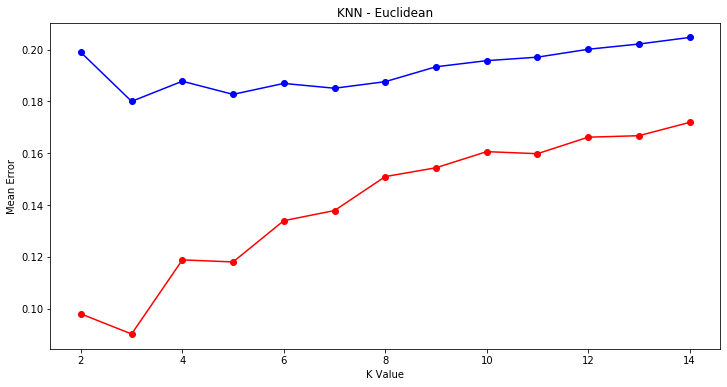

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 15),train_error, marker='o' ,color='red' )
plt.plot(range(2, 15),test_error, marker='o' ,color='blue' )

plt.title('KNN - Euclidean')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [0]:
train_error = []
test_error=[]
train_accuracies=[]
test_accuracies=[]
# Calculating error for K values between 1 and 40
for i in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=i,metric="manhattan")
    knn.fit(std_Xtrain, y_train)
    train_pred=knn.predict(std_Xtrain)

    test_pred = knn.predict(std_Xtest)
    
    train_accuracies.append(accuracy_score(y_train,train_pred))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    train_error.append(np.mean(y_train!=train_pred))
    test_error.append(np.mean(y_test!=test_pred))

[0.803749366661037,
 0.8224961999662219,
 0.8140516804593818,
 0.8181050498226651,
 0.8170917074818442,
 0.8167539267015707,
 0.8162472555311603,
 0.8115183246073299,
 0.8098294207059619,
 0.8081405168045939,
 0.8040871474413106,
 0.8023982435399426,
 0.7991893261273434]

Text(0, 0.5, 'Mean Error')

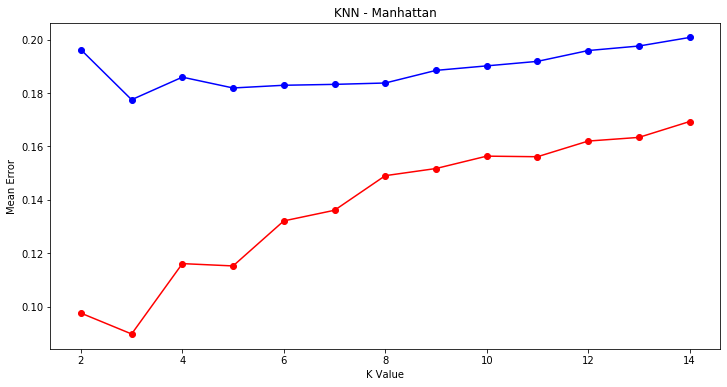

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 15),train_error, marker='o' ,color='red' )
plt.plot(range(2, 15),test_error, marker='o' ,color='blue' )

plt.title('KNN - Manhattan')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [0]:
knn = KNeighborsClassifier(n_neighbors=8,metric="manhattan")
knn.fit(std_Xtrain, y_train)
train_pred=knn.predict(std_Xtrain)

test_pred = knn.predict(std_Xtest)
print(classification_report(y_test,test_pred))
print(confusion_matrix(y_test,test_pred))
print(accuracy_score(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77      2211
           1       0.89      0.80      0.85      3710

    accuracy                           0.82      5921
   macro avg       0.81      0.82      0.81      5921
weighted avg       0.83      0.82      0.82      5921

[[1856  355]
 [ 733 2977]]
0.8162472555311603
